In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [14]:
import pandas as pd
import numpy as np
import os
from os.path import join, isdir, dirname, basename, exists
from os import mkdir
import glob as glob
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(context="paper",style="white",font_scale=1.5)

In [15]:
SCR_betapath = '../../SCR_new/dataset/results_ShockUncensored/{subj}/{group}lable/splitted_regs/shock_IM/{subj}_bucket_REML_clean.1D'
roi_betapath = '../../dataset/results_ShockUncensored/{subj}/{group}lable/splitted_regs/ROI_{roi}/noProx/shock_IM/{subj}_bucket_REML.1D'
yoked = pd.read_excel('../../SCR_new/scripts/CON_yoked_table.xlsx')
yoked = yoked.query('use == 1')

In [18]:
rois = 'rvAI rdAI lvAI ldAI rPI lPI rBNST lBNST ACC\
        Amygdala_BLBM_La_R Amygdala_CeME_R Amygdala_BLBM_La_L Amygdala_CeME_L\
        rCa lCa rPa lPa rVS lVS vmPFC PCC1 PCC2 rPAG1 lPAG1'.split()

#rois = 'Amygdala_BLBM_La_R Amygdala_CeME_R Amygdala_BLBM_La_L Amygdala_CeME_L lPa rVS lVS'.split()

#rois = 'lBNST rBNST'.split()

24

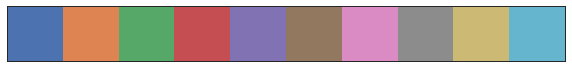

In [19]:
pal = sns.color_palette()
sns.palplot(pal)
len(rois)

In [20]:
count = 0
df = pd.DataFrame()
for i, row in yoked.iterrows():
    for kind in ['control','uncontrol']:
        print(row[kind])
        scr_beta = np.loadtxt(SCR_betapath.format(subj=row[kind],group=kind))[25::2]
        roi_beta = np.vstack([np.loadtxt(roi_betapath.format(subj=row[kind],roi=roi,group=kind))[25::2] for roi in rois]).T
        all_betas = np.concatenate((scr_beta[:,None],roi_beta),axis=1)

        tmp_df = pd.DataFrame(all_betas,columns=['SCR']+rois)
        tmp_df['SubjID'] = row[kind]
        tmp_df['Group'] = kind
        tmp_df['Pair'] = 'P{:02d}'.format(i)
        df = pd.concat([df,tmp_df],axis =0)

CON001
CON031
CON002
CON021
CON003
CON022
CON004
CON030
CON005
CON023
CON006
CON025
CON007
CON016
CON008
CON053
CON009
CON052
CON010
CON089
CON011
CON020
CON012
CON033
CON013
CON019
CON014
CON084
CON015
CON027
CON017
CON049
CON018
CON028
CON024
CON026
CON029
CON054
CON032
CON034
CON035
CON036
CON037
CON058
CON038
CON056
CON039
CON075
CON040
CON072
CON041
CON055
CON042
CON061
CON043
CON057
CON044
CON067
CON045
CON064
CON046
CON068
CON047
CON059
CON048
CON051
CON050
CON078
CON060
CON077
CON062
CON066
CON063
CON098
CON065
CON076
CON069
CON073
CON071
CON085
CON074
CON091
CON079
CON090
CON080
CON082
CON083
CON097
CON086
CON101
CON087
CON092
CON088
CON103
CON093
CON102
CON094
CON099
CON095
CON096
CON104
CON106
CON105
CON110
CON107
CON119
CON108
CON118
CON109
CON116
CON111
CON114
CON112
CON113


In [21]:
cmap = plt.get_cmap('Set1')
def plot_SCR_ROI_corr(roi):
    fig = plt.figure(figsize=(8,6))
    sns.regplot('SCR',roi,df[df['Group']=='uncontrol'],color=cmap.colors[0],
                scatter_kws={'edgecolors':'black','s':50,'alpha':0.5,'color':cmap.colors[0]},label='uncontrol')
    sns.regplot('SCR',roi,df[df['Group']=='control'],color=cmap.colors[1],
                scatter_kws= {'edgecolors':'black','s':50,'alpha':0.5,'color':cmap.colors[1]},label='control')
    plt.xlabel('Skin Conductance\n[Shock] (A.U.)')
    plt.ylabel('{}\n[Shock] (A.U.)'.format(roi))
    plt.legend()
    plt.savefig('figures/{}_SCR_correlation.png'.format(roi),dpi=600)

[None, None, None]

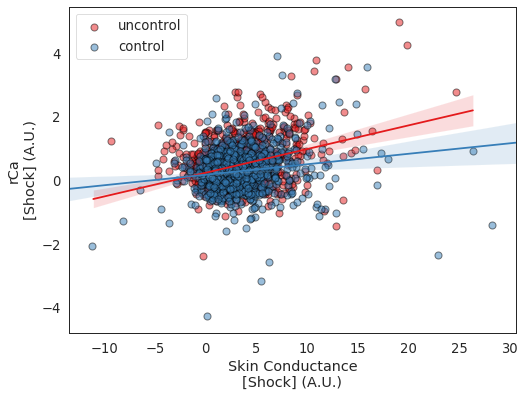

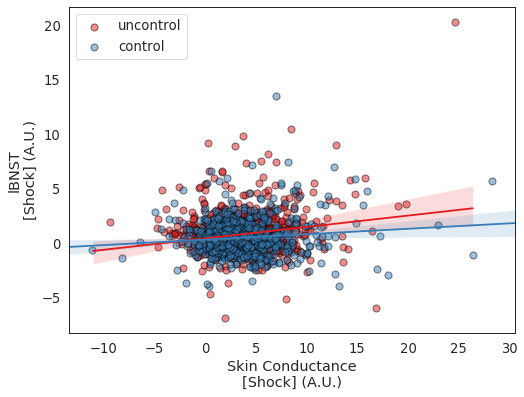

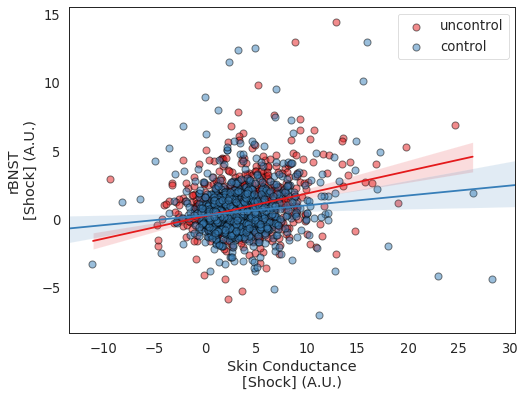

In [22]:
[plot_SCR_ROI_corr(roi) for roi in ['rCa','lBNST','rBNST']]

In [23]:
from scipy.stats import pearsonr, spearmanr, ttest_rel, ttest_1samp
import math

In [24]:
def ttest_SCR_roi(roi):
    con = []; uncon = []
    for i, row in yoked.iterrows():
        con_roi = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='control')][roi].values
        uncon_roi = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='uncontrol')][roi].values

        con_SCR = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='control')]['SCR'].values
        uncon_SCR = df[(df['Pair']=='P{:02d}'.format(i)) & (df['Group']=='uncontrol')]['SCR'].values

        con_rp,_ = pearsonr(con_roi,con_SCR)
        uncon_rp,_ = pearsonr(uncon_roi,uncon_SCR)

        con_zp = math.atanh(con_rp)
        uncon_zp = math.atanh(uncon_rp)

        con.append(con_zp); uncon.append(uncon_zp)
        
    print(roi,':',ttest_1samp(np.subtract(uncon,con),0))

In [25]:
print([ttest_SCR_roi(roi) for roi in rois])

rvAI : Ttest_1sampResult(statistic=0.34791362365632134, pvalue=0.7292094620984353)
rdAI : Ttest_1sampResult(statistic=0.623161937218154, pvalue=0.5357079259118274)
lvAI : Ttest_1sampResult(statistic=0.9848076318795316, pvalue=0.3289544860109457)
ldAI : Ttest_1sampResult(statistic=0.721110943508385, pvalue=0.4738411282628405)
rPI : Ttest_1sampResult(statistic=0.08190465073330973, pvalue=0.9350145820836333)
lPI : Ttest_1sampResult(statistic=-0.01633287775184444, pvalue=0.9870268808165685)
rBNST : Ttest_1sampResult(statistic=2.4713776728453234, pvalue=0.016526705586451182)
lBNST : Ttest_1sampResult(statistic=1.9188974397169702, pvalue=0.06009937606516158)
ACC : Ttest_1sampResult(statistic=0.1675083977252796, pvalue=0.8675734925004488)
Amygdala_BLBM_La_R : Ttest_1sampResult(statistic=-0.9422045435634402, pvalue=0.3501349887207932)
Amygdala_CeME_R : Ttest_1sampResult(statistic=1.9132886966436444, pvalue=0.060828643791909)
Amygdala_BLBM_La_L : Ttest_1sampResult(statistic=-0.5999672395618857,